In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# 32,FCAE,99.450008,26.616797,13.090332,21340,0.081406
# 32,FCNN,99.752027,8.247746,27.85498,1519074,5.794807
# 64,FCAE,99.450008,11.945585,14.213379,21340,0.081406
# 64,FCNN,99.752027,6.880986,27.292969,1519074,5.794807
# 128,FCAE,99.249722,6.908247,16.459473,21340,0.081406
# 128,FCNN,99.548561,3.464345,27.805176,1519074,5.794807
# 256,FCAE,98.842791,5.172041,21.068848,21340,0.081406
# 256,FCNN,99.141631,3.654544,29.482422,1519074,5.794807
# 512,FCAE,98.839612,2.806637,29.94043,21340,0.081406
# 512,FCNN,99.141631,2.018859,31.446289,1519074,5.794807
# 1024,FCAE,97.21189,2.37173,47.915039,21340,0.081406
# 1024,FCNN,97.513909,1.989789,37.049805,1519074,5.794807

In [31]:
# Daten laden
file_path = "FCAE_FCNN_Comparison.csv"  # Passe den Pfad entsprechend an
data = pd.read_csv(file_path)

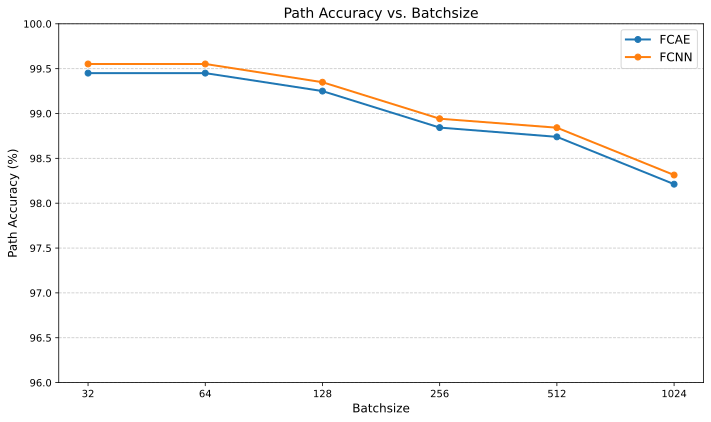

In [32]:
# Modelle und Daten vorbereiten
models = ["FCAE", "FCNN"]
colors = ["#1f77b4", "#ff7f0e"]  # Farben für die Linien
batchsizes = data["Batchsize"].unique()

# Gleichmäßige Abstände auf der X-Achse
x_positions = np.arange(len(batchsizes))

plt.figure(figsize=(10, 6))

# Linien für jedes Modell zeichnen
for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    plt.plot(
        x_positions,
        model_data["Path Accuracy (%)"],
        label=model,
        color=colors[i],
        marker="o",
        linewidth=2,
    )

# X-Achse anpassen
plt.xticks(x_positions, batchsizes, fontsize=10)
plt.title("Path Accuracy vs. Batchsize", fontsize=14)
plt.ylim((96, 100))
plt.xlabel("Batchsize", fontsize=12)
plt.ylabel("Path Accuracy (%)", fontsize=12)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

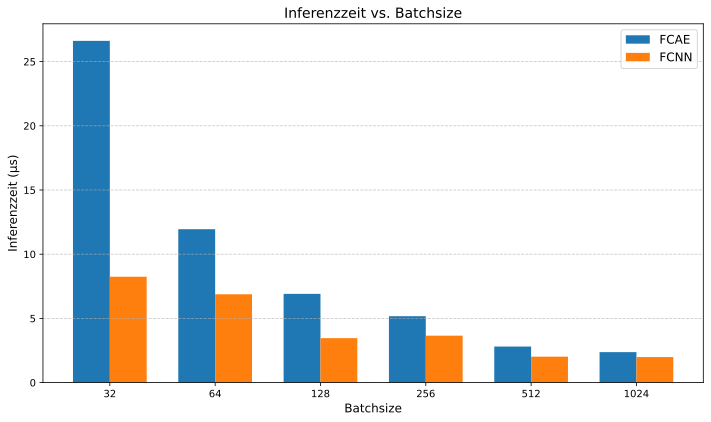

In [87]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = ["#1f77b4", "#ff7f0e"]  # Blau für FCAE, Orange für FCNN
batchsizes = data["Batchsize"].unique()

# Balkenpositionen
bar_width = 0.35
x_positions = np.arange(len(batchsizes))

plt.figure(figsize=(10, 6))

# Balken für jedes Modell zeichnen
for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    plt.bar(
        x_positions + i * bar_width - bar_width / 2,
        model_data["Inference Time GPU (µs)"],
        width=bar_width,
        label=model,
        color=colors[i],
    )
    
plt.xticks(x_positions, batchsizes, fontsize=10)
plt.title("Inferenzzeit vs. Batchsize", fontsize=14)
plt.xlabel("Batchsize", fontsize=12)
plt.ylabel("Inferenzzeit (µs)", fontsize=12)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.savefig("./inferenzzeit_batchsize", bbox_inches="tight")
plt.show()

C:\Users\lucwe\AppData\Local\Temp\ipykernel_17100\2016830581.py:30: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(axis="y", linestyle="--", alpha=0.7, visible=False)


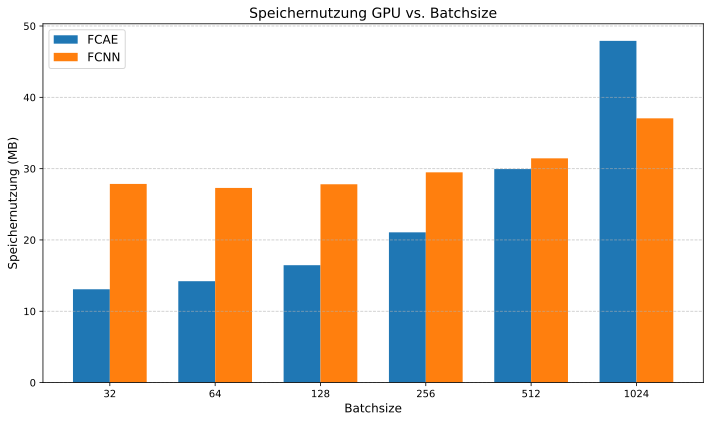

In [ ]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = ["#1f77b4", "#ff7f0e"]  # Blau für FCAE, Orange für FCNN
batchsizes = data["Batchsize"].unique()

# Balkenpositionen
bar_width = 0.35
x_positions = np.arange(len(batchsizes))

plt.figure(figsize=(10, 6))

# Balken für jedes Modell zeichnen
for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    plt.bar(
        x_positions + i * bar_width - bar_width / 2,
        model_data["Memory Usage GPU (MB)"],
        width=bar_width,
        label=model,
        color=colors[i],
    )

# X-Achse anpassen
plt.xticks(x_positions, batchsizes, fontsize=10)
plt.title("Speichernutzung GPU vs. Batchsize", fontsize=14)
plt.xlabel("Batchsize", fontsize=12)
plt.ylabel("Speichernutzung (MB)", fontsize=12)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
# plt.savefig("./speichernutzung_batchsize", bbox_inches="tight")
plt.show()

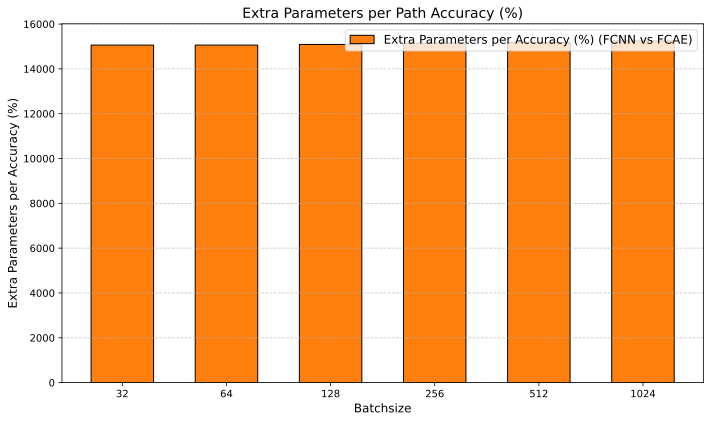

In [43]:
# Daten für FCAE und FCNN filtern
fcae_data = data[data["Model"] == "FCAE"]
fcnn_data = data[data["Model"] == "FCNN"]

# Berechnung: Zusätzliche Parameter pro Path Accuracy
fcae_accuracy = fcae_data["Path Accuracy (%)"].values
fcnn_accuracy = fcnn_data["Path Accuracy (%)"].values
fcae_params = fcae_data["Parameter Count"].values
fcnn_params = fcnn_data["Parameter Count"].values

# Zusätzliche Parameter pro Path Accuracy
extra_params_per_accuracy = (fcnn_params - fcae_params) / fcae_accuracy

# Batchgrößen als X-Achse
batchsizes = fcae_data["Batchsize"].values
x_positions = np.arange(len(batchsizes))

plt.figure(figsize=(10, 6))

# Balkendiagramm zeichnen
plt.bar(
    x_positions,
    extra_params_per_accuracy,
    color="#ff7f0e",
    edgecolor="black",
    width=0.6,
    label="Extra Parameters per Accuracy (%) (FCNN vs FCAE)"
)

# Achsenbeschriftung und Titel
plt.xticks(x_positions, batchsizes, fontsize=10)
plt.title("Extra Parameters per Path Accuracy (%)", fontsize=14)
plt.xlabel("Batchsize", fontsize=12)
plt.ylabel("Extra Parameters per Accuracy (%)", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Legende und Anzeige
plt.legend(fontsize=12)
plt.show()

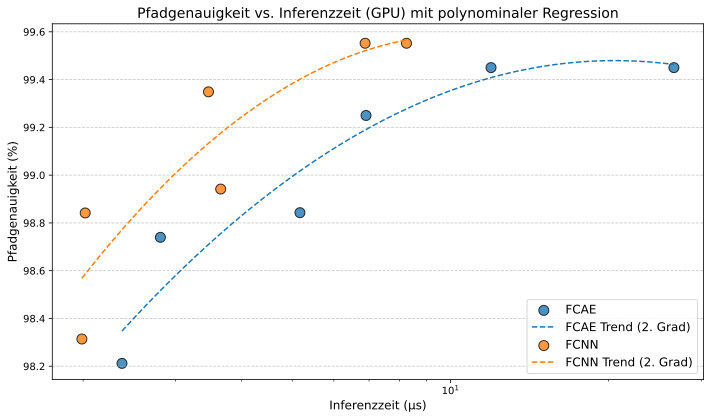

In [83]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = ["#1f77b4", "#ff7f0e"]  # Blau für FCAE, Orange für FCNN

plt.figure(figsize=(10, 6))

# Streudiagramm und polynomische Regressionskurve für jedes Modell
for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    x = model_data["Inference Time GPU (µs)"]
    y = model_data["Path Accuracy (%)"]
    
    # Streudiagramm
    plt.scatter(
        x, y, label=model, color=colors[i], s=100, alpha=0.8, edgecolor="black"
    )
    
    # Polynomische Regression (2. Grad)
    coeffs = np.polyfit(np.log10(x), y, 2)  # Quadratische Regression (logarithmisch)
    
    # Zusätzliche X-Werte für eine glatte Kurve generieren
    x_smooth = np.logspace(np.log10(x.min()), np.log10(x.max()), 500)  # 500 Punkte
    reg_line = coeffs[0] * np.log10(x_smooth)**2 + coeffs[1] * np.log10(x_smooth) + coeffs[2]
    
    # Glatte Kurve plotten
    plt.plot(
        x_smooth, reg_line, color=colors[i], linestyle="--", label=f"{model} Trend (2. Grad)"
    )

# Achsenbeschriftung und Titel
plt.title("Pfadgenauigkeit vs. Inferenzzeit (GPU) mit polynominaler Regression", fontsize=14)
plt.xlabel("Inferenzzeit (µs)", fontsize=12)
plt.ylabel("Pfadgenauigkeit (%)", fontsize=12)
plt.xscale("log")  # Logarithmische Skala für Inference Time
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.savefig("./pfadgenauigkeit_inferenzzeit", bbox_inches="tight")
plt.show()

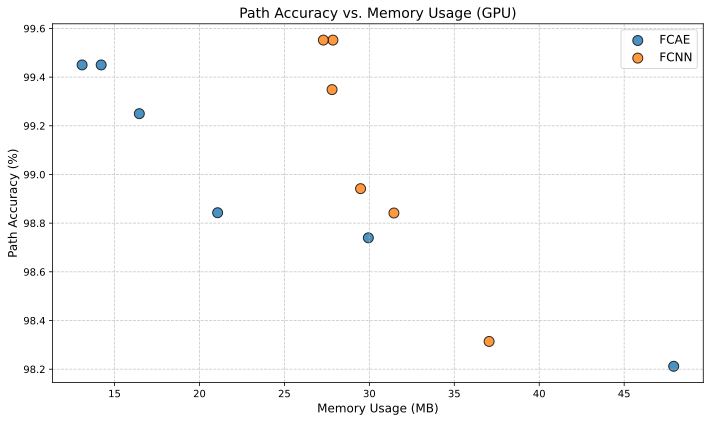

In [55]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = ["#1f77b4", "#ff7f0e"]  # Blau für FCAE, Orange für FCNN

plt.figure(figsize=(10, 6))

# Streudiagramm für jedes Modell
for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    plt.scatter(
        model_data["Memory Usage GPU (MB)"],
        model_data["Path Accuracy (%)"],
        label=model,
        color=colors[i],
        s=100,  # Punktgröße
        alpha=0.8,
        edgecolor="black",
    )

# Achsenbeschriftung und Titel
plt.title("Path Accuracy vs. Memory Usage (GPU)", fontsize=14)
plt.xlabel("Memory Usage (MB)", fontsize=12)
plt.ylabel("Path Accuracy (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

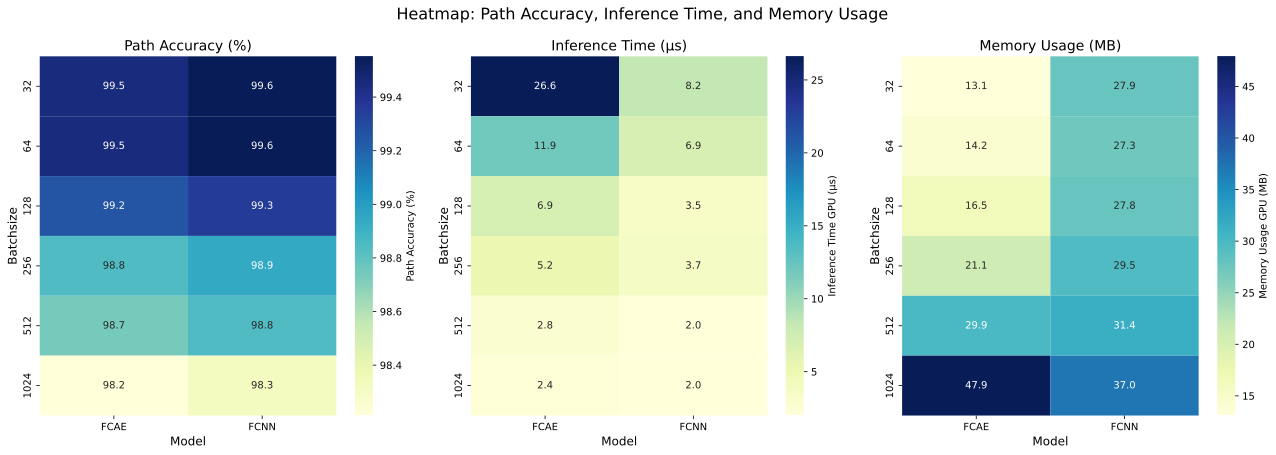

In [56]:
import seaborn as sns

# Heatmap-Daten vorbereiten
heatmap_data = data.pivot_table(
    index="Batchsize", columns="Model", values=["Path Accuracy (%)", "Inference Time GPU (µs)", "Memory Usage GPU (MB)"]
)

# Subplots für jede Metrik
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ["Path Accuracy (%)", "Inference Time GPU (µs)", "Memory Usage GPU (MB)"]
titles = ["Path Accuracy (%)", "Inference Time (µs)", "Memory Usage (MB)"]

for i, metric in enumerate(metrics):
    sns.heatmap(
        heatmap_data[metric],
        annot=True, fmt=".1f", cmap="YlGnBu", ax=axes[i], cbar_kws={"label": metric}
    )
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel("Model", fontsize=12)
    axes[i].set_ylabel("Batchsize", fontsize=12)

plt.tight_layout()
plt.suptitle("Heatmap: Path Accuracy, Inference Time, and Memory Usage", fontsize=16, y=1.05)
plt.show()

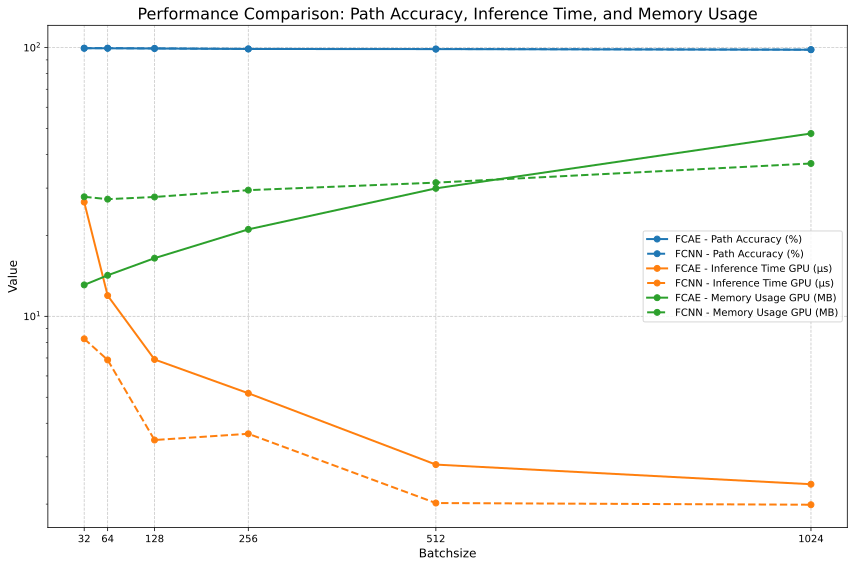

In [57]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = {"Path Accuracy (%)": "#1f77b4", "Inference Time GPU (µs)": "#ff7f0e", "Memory Usage GPU (MB)": "#2ca02c"}
line_styles = {"FCAE": "-", "FCNN": "--"}  # Unterschiedliche Linienstile für die Modelle

plt.figure(figsize=(12, 8))

# Plotten für jede Metrik und jedes Modell
metrics = ["Path Accuracy (%)", "Inference Time GPU (µs)", "Memory Usage GPU (MB)"]
for metric in metrics:
    for model in models:
        model_data = data[data["Model"] == model]
        plt.plot(
            model_data["Batchsize"],
            model_data[metric],
            label=f"{model} - {metric}",
            color=colors[metric],
            linestyle=line_styles[model],
            marker="o",
            linewidth=2,
        )

# Achsenbeschriftung und Titel
plt.title("Performance Comparison: Path Accuracy, Inference Time, and Memory Usage", fontsize=16)
plt.xlabel("Batchsize", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.yscale("log")  # Logarithmische Skala für bessere Darstellung (Inference Time und Memory)
plt.xticks(data["Batchsize"].unique(), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

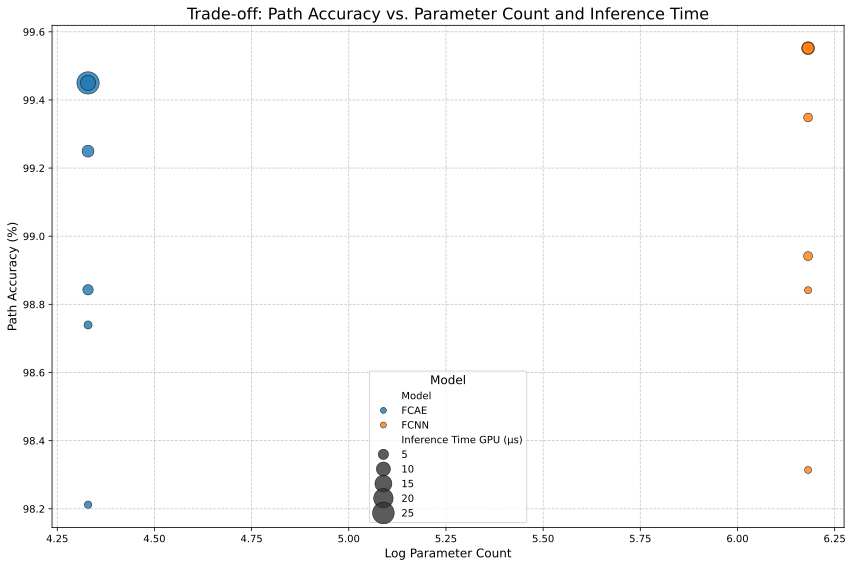

In [58]:
# Parameter Count auf logarithmischer Skala
data["Log Parameter Count"] = np.log10(data["Parameter Count"])

# Bubble-Plot erstellen
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=data,
    x="Log Parameter Count",
    y="Path Accuracy (%)",
    size="Inference Time GPU (µs)",
    hue="Model",
    palette={"FCAE": "#1f77b4", "FCNN": "#ff7f0e"},
    sizes=(50, 500),  # Punktgrößenbereich
    alpha=0.8,
    edgecolor="black",
)

# Diagramm anpassen
bubble_plot.set_title("Trade-off: Path Accuracy vs. Parameter Count and Inference Time", fontsize=16)
bubble_plot.set_xlabel("Log Parameter Count", fontsize=12)
bubble_plot.set_ylabel("Path Accuracy (%)", fontsize=12)
bubble_plot.legend(title="Model", fontsize=10, title_fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

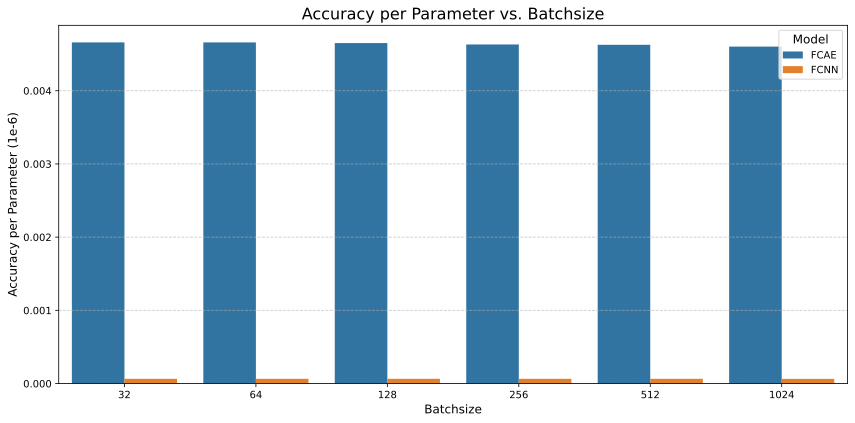

In [59]:
# Berechnung der Accuracy per Parameter
data["Accuracy per Parameter"] = data["Path Accuracy (%)"] / data["Parameter Count"]

# Barplot mit Seaborn erstellen
plt.figure(figsize=(12, 6))
accuracy_plot = sns.barplot(
    data=data,
    x="Batchsize",
    y="Accuracy per Parameter",
    hue="Model",
    palette={"FCAE": "#1f77b4", "FCNN": "#ff7f0e"},
)

# Diagramm anpassen
accuracy_plot.set_title("Accuracy per Parameter vs. Batchsize", fontsize=16)
accuracy_plot.set_xlabel("Batchsize", fontsize=12)
accuracy_plot.set_ylabel("Accuracy per Parameter (1e-6)", fontsize=12)
accuracy_plot.legend(title="Model", fontsize=10, title_fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.show()

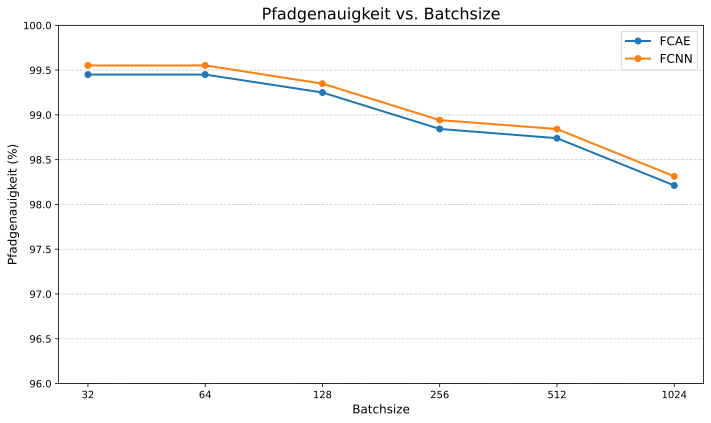

In [85]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = ["#1f77b4", "#ff7f0e"]  # Blau für FCAE, Orange für FCNN

# Gleichmäßige X-Positionen
batchsizes = data["Batchsize"].unique()
x_positions = np.arange(len(batchsizes))

plt.figure(figsize=(10, 6))

# Linien für jedes Modell zeichnen
for i, model in enumerate(models):
    model_data = data[data["Model"] == model]
    plt.plot(
        x_positions,
        model_data["Path Accuracy (%)"],
        label=model,
        color=colors[i],
        marker="o",
        linewidth=2,
    )

# X-Achse anpassen
plt.ylim((96, 100))
plt.xticks(x_positions, batchsizes, fontsize=10)
plt.title("Pfadgenauigkeit vs. Batchsize", fontsize=16)
plt.xlabel("Batchsize", fontsize=12)
plt.ylabel("Pfadgenauigkeit (%)", fontsize=12)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Diagramm anzeigen
plt.savefig("./pfadgenauigkeit_batchsize", bbox_inches="tight")
plt.show()

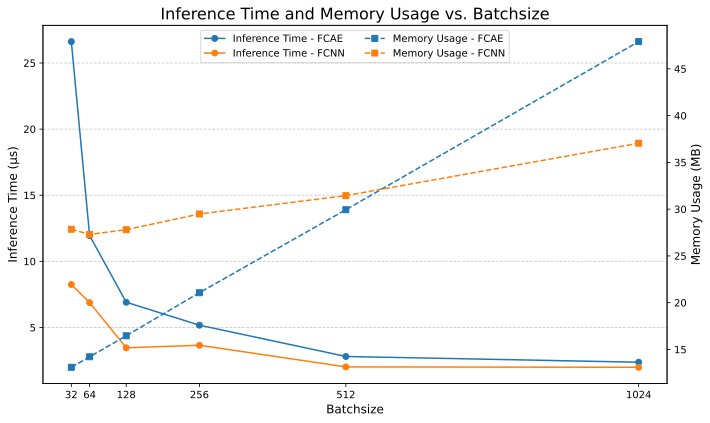

In [77]:
# Modelle und Farben definieren
models = ["FCAE", "FCNN"]
colors = {"FCAE": "#1f77b4", "FCNN": "#ff7f0e"}  # Blau für FCAE, Orange für FCNN

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Inference Time auf der linken Y-Achse
for model in models:
    model_data = data[data["Model"] == model]
    ax1.plot(
        model_data["Batchsize"],
        model_data["Inference Time GPU (µs)"],
        label=f"Inference Time - {model}",
        color=colors[model],
        linestyle="-",
        marker="o",
    )

ax1.set_xlabel("Batchsize", fontsize=12)
ax1.set_ylabel("Inference Time (µs)", fontsize=12, color="black")
# ax1.set_yscale("log")
# ax1.set_xscale("log")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_xticks(data["Batchsize"].unique())  # X-Achse mit Batchsizes
ax1.set_xticklabels(data["Batchsize"].unique(), fontsize=10)  # Beschriftung der X-Achse
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Memory Usage auf der rechten Y-Achse
ax2 = ax1.twinx()
for model in models:
    model_data = data[data["Model"] == model]
    ax2.plot(
        model_data["Batchsize"],
        model_data["Memory Usage GPU (MB)"],
        label=f"Memory Usage - {model}",
        color=colors[model],
        linestyle="--",
        marker="s",
    )

ax2.set_ylabel("Memory Usage (MB)", fontsize=12, color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Legende
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper center", fontsize=10, ncol=2)

# Titel und Layout
plt.title("Inference Time and Memory Usage vs. Batchsize", fontsize=16)
plt.tight_layout()
plt.show()

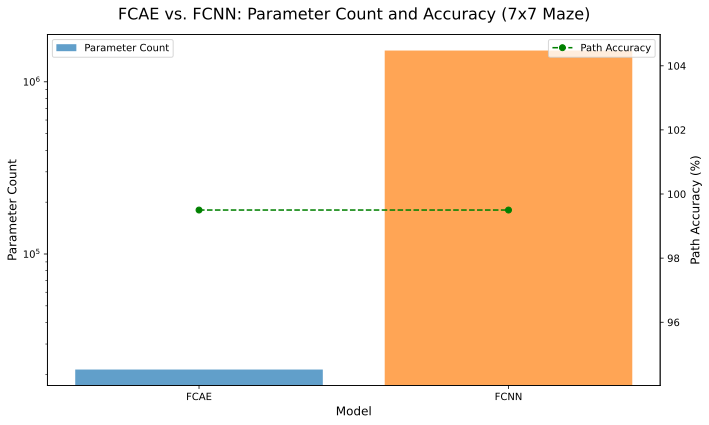

In [78]:
# Daten für 7x7 Labyrinth
models = ["FCAE", "FCNN"]
parameter_count = [21340, 1519074]  # Parameter für FCAE und FCNN
accuracy = [99.5, 99.5]  # Beide Modelle erreichen etwa die gleiche Genauigkeit

# Balkendiagramm erstellen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Parameter Count als Balken
ax1.bar(models, parameter_count, color=["#1f77b4", "#ff7f0e"], alpha=0.7, label="Parameter Count")
ax1.set_ylabel("Parameter Count", fontsize=12)
ax1.set_yscale("log")  # Logarithmische Skala für Parameter Count
ax1.tick_params(axis="y")
ax1.set_xlabel("Model", fontsize=12)

# Genauigkeit als zusätzliche Markierungen
ax2 = ax1.twinx()
ax2.plot(models, accuracy, color="green", marker="o", linestyle="--", label="Path Accuracy")
ax2.set_ylabel("Path Accuracy (%)", fontsize=12)
ax2.tick_params(axis="y")

# Titel und Legenden
fig.suptitle("FCAE vs. FCNN: Parameter Count and Accuracy (7x7 Maze)", fontsize=16)
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\lucwe\AppData\Local\Temp\ipykernel_17100\1718001662.py:8: RankWarning: Polyfit may be poorly conditioned
  fcae_fit = np.polyfit(np.array(maze_sizes)**2, fcae_params, 1)  # Quadratische Skala
C:\Users\lucwe\AppData\Local\Temp\ipykernel_17100\1718001662.py:9: RankWarning: Polyfit may be poorly conditioned
  fcnn_fit = np.polyfit(np.array(maze_sizes)**2, fcnn_params, 1)


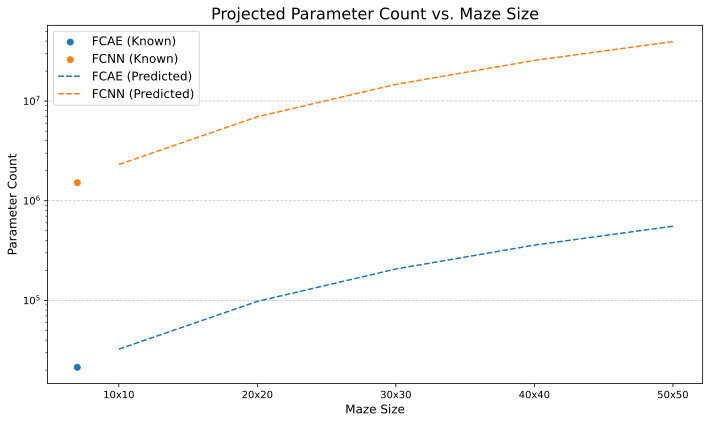

In [80]:
# Bekannte Daten
maze_sizes = [7]  # Bekannte Labyrinthgröße
fcae_params = [21340]  # FCAE Parameteranzahl
fcnn_params = [1519074]  # FCNN Parameteranzahl

# Quadratische Anpassung für beide Modelle
new_maze_sizes = [10, 20, 30, 40, 50]  # Zukünftige Labyrinthgrößen
fcae_fit = np.polyfit(np.array(maze_sizes)**2, fcae_params, 1)  # Quadratische Skala
fcnn_fit = np.polyfit(np.array(maze_sizes)**2, fcnn_params, 1)

# Voraussage der Parameteranzahl
fcae_predicted = np.polyval(fcae_fit, np.array(new_maze_sizes)**2)
fcnn_predicted = np.polyval(fcnn_fit, np.array(new_maze_sizes)**2)

# Plot erstellen
plt.figure(figsize=(10, 6))

# Punkte für bekannte Daten
plt.scatter(maze_sizes, fcae_params, color="#1f77b4", label="FCAE (Known)", zorder=5)
plt.scatter(maze_sizes, fcnn_params, color="#ff7f0e", label="FCNN (Known)", zorder=5)

# Linien für Vorhersagen
plt.plot(new_maze_sizes, fcae_predicted, color="#1f77b4", linestyle="--", label="FCAE (Predicted)")
plt.plot(new_maze_sizes, fcnn_predicted, color="#ff7f0e", linestyle="--", label="FCNN (Predicted)")

# Achsen und Beschriftungen
plt.title("Projected Parameter Count vs. Maze Size", fontsize=16)
plt.xlabel("Maze Size", fontsize=12)
plt.ylabel("Parameter Count", fontsize=12)
plt.yscale("log")  # Logarithmische Skala für Parameter Count
plt.xticks(new_maze_sizes, labels=[f"{size}x{size}" for size in new_maze_sizes], fontsize=10)  # Maze Größe als Label
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()